# Chapter 1: Manipulate and explore NetCDF files by xarray

**Prerequisite**: Minimal Python knowledge in [Chapter00_basic_python.ipynb](./Chapter00_basic_python.ipynb).

[NetCDF](https://www.unidata.ucar.edu/software/netcdf/) is the most commonly used data format in Earth science. Almost every language has a way to open NetCDF file; Python has **many** ways! Including:
- [netcdf4-python](http://unidata.github.io/netcdf4-python/)
- [scipy.io.netcdf_file](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.netcdf_file.html)
- [h5netcdf](https://github.com/shoyer/h5netcdf) via [h5py](http://docs.h5py.org)

However, you are **not** supposed to directly use those packages. Instead, [xarray](https://xarray.pydata.org) provides a much more elegant user interface ("frontend") to access NetCDF files. It can use any of the above packages as "backend". Xarray also supports [many other data formats](http://xarray.pydata.org/en/stable/io.html), even the BPCH file in GEOS-Chem. BPCH data will be covered in the next chapter: [Chapter02_NC_and_bpch_diagnostics.ipynb](./Chapter02_NC_and_bpch_diagnostics.ipynb).

Here we focus on GEOS-Chem NetCDF restart files, which can be easily obtained without actually running GEOS-Chem. This git repository already contains an example file `initial_GEOSChem_rst.4x5_tropchem.nc`. You can get other [restart files](http://wiki.seas.harvard.edu/geos-chem/index.php/GEOS-Chem_basics#Restart_files) at:

```
ftp://ftp.as.harvard.edu/gcgrid/data/ExtData/SPC_RESTARTS/
```

In [1]:
# those modules are almost always imported when working with model data
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr # the major tool to work with NetCDF data!

# Open file and perform basic manipulation

`xr.open_dataset()` reads the entire NetCDF file into this `ds` object. You can view all variables, coordinates, dimensions and metadata by just printing this object.

In [2]:
ds = xr.open_dataset("initial_GEOSChem_rst.4x5_tropchem.nc")
ds # same as print(ds) in IPython/Jupyter environment

<xarray.Dataset>
Dimensions:     (lat: 46, lev: 47, lon: 72, time: 1)
Coordinates:
  * time        (time) datetime64[ns] 2005-07-01
  * lev         (lev) float32 0.9924996 0.9774562 ... 2.7634127e-05
  * lat         (lat) float32 -89.0 -86.0 -82.0 -78.0 ... 78.0 82.0 86.0 89.0
  * lon         (lon) float32 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
Data variables:
    TRC_NO      (time, lev, lat, lon) float32 ...
    TRC_O3      (time, lev, lat, lon) float32 ...
    TRC_PAN     (time, lev, lat, lon) float32 ...
    TRC_CO      (time, lev, lat, lon) float32 ...
    TRC_ALK4    (time, lev, lat, lon) float32 ...
    TRC_ISOP    (time, lev, lat, lon) float32 ...
    TRC_HNO3    (time, lev, lat, lon) float32 ...
    TRC_H2O2    (time, lev, lat, lon) float32 ...
    TRC_ACET    (time, lev, lat, lon) float32 ...
    TRC_MEK     (time, lev, lat, lon) float32 ...
    TRC_ALD2    (time, lev, lat, lon) float32 ...
    TRC_RCHO    (time, lev, lat, lon) float32 ...
    TRC_MVK     (time, lev, lat, lon) float32 ...
    TRC_MACR    (time, lev, lat, lon) float32 ...
    TRC_PMN     (time, lev, lat, lon) float32 ...
    TRC_PPN     (time, lev, lat, lon) float32 ...
    TRC_R4N2    (time, lev, lat, lon) float32 ...
    TRC_PRPE    (time, lev, lat, lon) float32 ...
    TRC_C3H8    (time, lev, lat, lon) float32 ...
    TRC_CH2O    (time, lev, lat, lon) float32 ...
    TRC_C2H6    (time, lev, lat, lon) float32 ...
    TRC_N2O5    (time, lev, lat, lon) float32 ...
    TRC_HNO4    (time, lev, lat, lon) float32 ...
    TRC_MP      (time, lev, lat, lon) float32 ...
    TRC_DMS     (time, lev, lat, lon) float32 ...
    TRC_SO2     (time, lev, lat, lon) float32 ...
    TRC_SO4     (time, lev, lat, lon) float32 ...
    TRC_SO4s    (time, lev, lat, lon) float32 ...
    TRC_MSA     (time, lev, lat, lon) float32 ...
    TRC_NH3     (time, lev, lat, lon) float32 ...
    TRC_NH4     (time, lev, lat, lon) float32 ...
    TRC_NIT     (time, lev, lat, lon) float32 ...
    TRC_NITs    (time, lev, lat, lon) float32 ...
    TRC_BCPI    (time, lev, lat, lon) float32 ...
    TRC_OCPI    (time, lev, lat, lon) float32 ...
    TRC_BCPO    (time, lev, lat, lon) float32 ...
    TRC_OCPO    (time, lev, lat, lon) float32 ...
    TRC_DST1    (time, lev, lat, lon) float32 ...
    TRC_DST2    (time, lev, lat, lon) float32 ...
    TRC_DST3    (time, lev, lat, lon) float32 ...
    TRC_DST4    (time, lev, lat, lon) float32 ...
    TRC_SALA    (time, lev, lat, lon) float32 ...
    TRC_SALC    (time, lev, lat, lon) float32 ...
    TRC_Br2     (time, lev, lat, lon) float32 ...
    TRC_Br      (time, lev, lat, lon) float32 ...
    TRC_BrO     (time, lev, lat, lon) float32 ...
    TRC_HOBr    (time, lev, lat, lon) float32 ...
    TRC_HBr     (time, lev, lat, lon) float32 ...
    TRC_BrNO2   (time, lev, lat, lon) float32 ...
    TRC_BrNO3   (time, lev, lat, lon) float32 ...
    TRC_CHBr3   (time, lev, lat, lon) float32 ...
    TRC_CH2Br2  (time, lev, lat, lon) float32 ...
    TRC_CH3Br   (time, lev, lat, lon) float32 ...
    TRC_MPN     (time, lev, lat, lon) float32 ...
    TRC_ISOPN   (time, lev, lat, lon) float32 ...
    TRC_MOBA    (time, lev, lat, lon) float32 ...
    TRC_PROPNN  (time, lev, lat, lon) float32 ...
    TRC_HAC     (time, lev, lat, lon) float32 ...
    TRC_GLYC    (time, lev, lat, lon) float32 ...
    TRC_MMN     (time, lev, lat, lon) float32 ...
    TRC_RIP     (time, lev, lat, lon) float32 ...
    TRC_IEPOX   (time, lev, lat, lon) float32 ...
    TRC_MAP     (time, lev, lat, lon) float32 ...
    TRC_NO2     (time, lev, lat, lon) float32 ...
    TRC_NO3     (time, lev, lat, lon) float32 ...
    TRC_HNO2    (time, lev, lat, lon) float32 ...
Attributes:
    Title:        COARDS/netCDF file created by BPCH2COARDS (GAMAP v2-17+)
    Conventions:  COARDS
    Format:       NetCDF-3
    Model:        GEOS5_47L
    Delta_Lon:    5.0
    Delta_Lat:    4.0
    NLayers:      47
    Start_Date:   20050701
    Start_Time:   0
    End_Date:     20050701
    End_Time:     0


`ds` is an xarray `Dataset`, which contains the complete information of a NetCDF file. Just think it as a much more powerful version of MATLAB/IDL's *structure* type.

In [3]:
type(ds)

xarray.core.dataset.Dataset

## Extracting variable

A `Dataset` typical contains many variables, just like a NetCDF file. To extract a single variable, simply use `ds['varname']`

In [4]:
dr = ds['TRC_O3']
dr

<xarray.DataArray 'TRC_O3' (time: 1, lev: 47, lat: 46, lon: 72)>
[155664 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2005-07-01
  * lev      (lev) float32 0.9924996 0.9774562 ... 0.00012699311 2.7634127e-05
  * lat      (lat) float32 -89.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 89.0
  * lon      (lon) float32 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
Attributes:
    long_name:  O3 tracer
    units:      mol/mol

The returning `dr` is a `DataArray`, containing all information of a single variable, including the numerical data itself, the coodinate information and additional attributes like *long_name* and *units* printed above.

In [5]:
type(dr)

xarray.core.dataarray.DataArray

`DataArray` (a single variable) and `Dataset` (containing multiple `DataArray`) are the only two data types you need to know in xarray.

## The "dictionary" type

The syntax `ds['varname']` (selecting a variable by its name, not index) just follows Python's `dictionary` type, a built-in data type for key-value pairs (which doesn't exist in MATLAB/IDL).

In [6]:
# make a simple dictionary
molecular_weight = dict(O3=48, CO=28) 
molecular_weight

{'O3': 48, 'CO': 28}

In [7]:
molecular_weight['O3'] # retrieve the value by the key

48

## Additional attributes ("metadata")

`DataArray` has some additional attributes to describe the variable. They can be accessed by `.attrs`. 

In [8]:
dr.attrs

{'long_name': 'O3 tracer', 'units': 'mol/mol'}

It is again a dictionary type (but with fixed order). Again, retrieve the value by the key:

In [9]:
dr.attrs['units']

'mol/mol'

In [10]:
dr.attrs['long_name']

'O3 tracer'

`DataSet` contains global attributes describing that NetCDF file

In [11]:
ds.attrs['Title']

'COARDS/netCDF file created by BPCH2COARDS (GAMAP v2-17+)'

## Conversion between xarray and numpy

If you don't need additional information like coordinates and units, you can always convert a `DataArray` to a pure numpy array by `dr.values`.

In [12]:
rawdata = dr.values # get pure numpy array
type(rawdata)

numpy.ndarray

Keep in mind that the dimension order in Python/C is often `[time, lev, lat, lon]`, while Fortran/MATLAB/IDL often uses `[lon, lat, lev, time]`.

In [13]:
rawdata.shape # [time, lev, lat, lon]

(1, 47, 46, 72)

Most of the time you **don't** need to convert `DataArray` to numpy array. Arithmetic operations and numpy functions can directly work on `DataArray`. For example, we multiply the data by $10^9$ and change the unit to ppbv.

In [14]:
dr_scaled = dr * 1e9
dr_scaled.attrs['units'] = 'ppbv'
dr_scaled

<xarray.DataArray 'TRC_O3' (time: 1, lev: 47, lat: 46, lon: 72)>
array([[[[  26.152372 ,   26.152372 ,   26.152372 , ...,   26.152372 ,
            26.152372 ,   26.152372 ],
         [  26.224115 ,   26.226318 ,   26.230103 , ...,   26.205269 ,
            26.221985 ,   26.20175  ],
         [  25.70759  ,   25.481674 ,   25.132504 , ...,   25.92743  ,
            25.66281  ,   25.705889 ],
         ...,
         [   8.588493 ,    9.013183 ,    8.793467 , ...,    8.650769 ,
             8.041175 ,    8.159272 ],
         [   6.4695745,    6.469804 ,    6.465895 , ...,    6.4761972,
             6.4768558,    6.4735236],
         [   6.460082 ,    6.460082 ,    6.460082 , ...,    6.460082 ,
             6.460082 ,    6.460082 ]],

        [[  26.32851  ,   26.32851  ,   26.32851  , ...,   26.32851  ,
            26.32851  ,   26.32851  ],
         [  26.338291 ,   26.334288 ,   26.341103 , ...,   26.32026  ,
            26.326118 ,   26.327644 ],
         [  25.830996 ,   25.599247 ,   25.269075 , ...,   26.063791 ,
            25.805511 ,   25.847313 ],
         ...,
         [  12.0095005,   14.102719 ,   16.376028 , ...,   10.14242  ,
            10.271758 ,   10.768439 ],
         [  10.846659 ,   10.846609 ,   10.846674 , ...,   10.84678  ,
            10.846533 ,   10.84656  ],
         [  10.847146 ,   10.847146 ,   10.847146 , ...,   10.847146 ,
            10.847146 ,   10.847146 ]],

        [[  26.498928 ,   26.498928 ,   26.498928 , ...,   26.498928 ,
            26.498928 ,   26.498928 ],
         [  26.499872 ,   26.493484 ,   26.504238 , ...,   26.479359 ,
            26.478836 ,   26.484106 ],
         [  25.956366 ,   25.734896 ,   25.47098  , ...,   26.192606 ,
            26.007582 ,   26.014185 ],
         ...,
         [  16.259487 ,   18.469208 ,   20.825533 , ...,   13.248153 ,
            13.4930935,   14.531434 ],
         [  18.308462 ,   18.308464 ,   18.308193 , ...,   18.308445 ,
            18.308458 ,   18.30845  ],
         [  18.30816  ,   18.30816  ,   18.30816  , ...,   18.30816  ,
            18.30816  ,   18.30816  ]],

        ...,

        [[1551.9534   , 1551.9534   , 1551.9534   , ..., 1551.9534   ,
          1551.9534   , 1551.9534   ],
         [1551.9534   , 1551.9534   , 1551.9534   , ..., 1551.9534   ,
          1551.9534   , 1551.9534   ],
         [1388.9314   , 1405.5814   , 1419.4387   , ..., 1299.265    ,
          1334.3169   , 1366.2227   ],
         ...,
         [1056.8788   , 1056.1206   , 1055.8057   , ..., 1060.1355   ,
          1059.0135   , 1057.9834   ],
         [1060.8269   , 1060.8269   , 1060.8269   , ..., 1060.8269   ,
          1060.8269   , 1060.8269   ],
         [1060.8269   , 1060.8269   , 1060.8269   , ..., 1060.8269   ,
          1060.8269   , 1060.8269   ]],

        [[ 219.01164  ,  219.01164  ,  219.01164  , ...,  219.01164  ,
           219.01164  ,  219.01164  ],
         [ 219.01157  ,  219.01157  ,  219.01157  , ...,  219.01157  ,
           219.01157  ,  219.01157  ],
         [ 207.07983  ,  206.09781  ,  205.64873  , ...,  211.87114  ,
           210.97433  ,  209.55557  ],
         ...,
         [ 248.61046  ,  248.76382  ,  249.06256  , ...,  249.3118   ,
           248.90778  ,  248.68777  ],
         [ 248.43762  ,  248.43762  ,  248.43762  , ...,  248.43762  ,
           248.43762  ,  248.43762  ],
         [ 248.43762  ,  248.43762  ,  248.43762  , ...,  248.43762  ,
           248.43762  ,  248.43762  ]],

        [[  59.938828 ,   59.938828 ,   59.938828 , ...,   59.938828 ,
            59.938828 ,   59.938828 ],
         [  59.93882  ,   59.93882  ,   59.93882  , ...,   59.93882  ,
            59.93882  ,   59.93882  ],
         [  58.96505  ,   58.551823 ,   57.98618  , ...,   59.785187 ,
            59.664997 ,   59.476467 ],
         ...,
         [  68.2674   ,   68.239784 ,   68.3136   , ...,   68.63562  ,
            68.512184 ,   68.380775 ],
         [  68.32266  ,   68.32266  ,   68.32266  , ...,   68.32266  ,
            68.3

The result is still an xarray `DataArray` with metadata attached. This means we can save it as a NetCDF file with one simple command, as promised in the [overview](https://github.com/JiaweiZhuang/GEOSChem-python-tutorial#i-already-have-lots-of-idl-scripts).

In [15]:
dr_scaled.to_netcdf('O3_in_ppbv.nc')  # just so easy, compared to IDL...

Use `ncdump` to make sure we do get a fully-fledged NetCDF file. Recall that commands after `!` are executed as shell commands outside of this notebook.

In [16]:
!ncdump -h O3_in_ppbv.nc

/bin/sh: ncdump: command not found


## Selecting sub-arrays

Conventionally, you will select data by indexing the pure numerical array `rawdata`, like that:

In [17]:
rawdata.shape # recall that this is the numerical data for Ozone field

(1, 47, 46, 72)

In [18]:
data_surf = rawdata[0,0,:,:]  # get the 1st time slice and the 1st level
data_surf.shape  # only contain lat and lon dimensions

(46, 72)

With the `DataArray` type, you can index the array by **dimension names**, without thinking about which dimension means *time* and which one means *level*. 

In [19]:
dr_surf = dr.isel(time=0, lev=0)
dr_surf

<xarray.DataArray 'TRC_O3' (lat: 46, lon: 72)>
array([[2.615237e-08, 2.615237e-08, 2.615237e-08, ..., 2.615237e-08,
        2.615237e-08, 2.615237e-08],
       [2.622411e-08, 2.622632e-08, 2.623010e-08, ..., 2.620527e-08,
        2.622198e-08, 2.620175e-08],
       [2.570759e-08, 2.548167e-08, 2.513250e-08, ..., 2.592743e-08,
        2.566281e-08, 2.570589e-08],
       ...,
       [8.588493e-09, 9.013182e-09, 8.793466e-09, ..., 8.650769e-09,
        8.041175e-09, 8.159272e-09],
       [6.469575e-09, 6.469804e-09, 6.465895e-09, ..., 6.476197e-09,
        6.476856e-09, 6.473523e-09],
       [6.460082e-09, 6.460082e-09, 6.460082e-09, ..., 6.460082e-09,
        6.460082e-09, 6.460082e-09]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2005-07-01
    lev      float32 0.9924996
  * lat      (lat) float32 -89.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 89.0
  * lon      (lon) float32 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
Attributes:
    long_name:  O3 tracer
    units:      mol/mol

Verify that both methods give the same result:

In [20]:
np.array_equal(data_surf, dr_surf.values)

True

`isel` is great, but sometimes `sel` is even more convenient. It allows you to select by **coordinate values**, not by indexs. 

Say we want to get the Ozone column at $(30^{\circ}N, 60^{\circ}E)$, simply:

In [21]:
dr.sel(lat=30, lon=60)

<xarray.DataArray 'TRC_O3' (time: 1, lev: 47)>
array([[4.068328e-08, 5.050242e-08, 5.876155e-08, 5.955357e-08, 5.968879e-08,
        5.977606e-08, 5.986353e-08, 5.992153e-08, 5.998514e-08, 6.008251e-08,
        6.033565e-08, 6.109599e-08, 6.267354e-08, 6.519493e-08, 6.797946e-08,
        7.064056e-08, 7.347479e-08, 7.423190e-08, 7.418809e-08, 7.522119e-08,
        7.754164e-08, 8.068380e-08, 8.334506e-08, 8.297422e-08, 8.062626e-08,
        7.573635e-08, 7.305054e-08, 7.200984e-08, 7.804263e-08, 8.291000e-08,
        8.687044e-08, 9.191075e-08, 9.778228e-08, 1.023950e-07, 1.297722e-07,
        2.252315e-07, 9.500231e-07, 2.735300e-06, 4.467108e-06, 6.410348e-06,
        8.152219e-06, 8.664225e-06, 6.528355e-06, 3.128378e-06, 1.485034e-06,
        3.132636e-07, 8.517083e-08]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2005-07-01
  * lev      (lev) float32 0.9924996 0.9774562 ... 0.00012699311 2.7634127e-05
    lat      float32 30.0
    lon      float32 60.0
Attributes:
    long_name:  O3 tracer
    units:      mol/mol

Conventionally, you need to count which element in `lat` array is 30 and which element in `lon` array is 60:

In [22]:
dr['lat'].values[30], dr['lon'].values[48]

(30.0, 60.0)

In [23]:
rawdata[:,:,30,48]  # gives the same result as the sel` method above

array([[4.0683279e-08, 5.0502422e-08, 5.8761550e-08, 5.9553575e-08,
        5.9688794e-08, 5.9776063e-08, 5.9863531e-08, 5.9921533e-08,
        5.9985140e-08, 6.0082513e-08, 6.0335651e-08, 6.1095989e-08,
        6.2673543e-08, 6.5194925e-08, 6.7979464e-08, 7.0640560e-08,
        7.3474794e-08, 7.4231899e-08, 7.4188087e-08, 7.5221195e-08,
        7.7541642e-08, 8.0683797e-08, 8.3345057e-08, 8.2974218e-08,
        8.0626258e-08, 7.5736345e-08, 7.3050543e-08, 7.2009840e-08,
        7.8042632e-08, 8.2909999e-08, 8.6870436e-08, 9.1910749e-08,
        9.7782276e-08, 1.0239502e-07, 1.2977223e-07, 2.2523146e-07,
        9.5002315e-07, 2.7352999e-06, 4.4671083e-06, 6.4103479e-06,
        8.1522194e-06, 8.6642249e-06, 6.5283552e-06, 3.1283778e-06,
        1.4850343e-06, 3.1326360e-07, 8.5170825e-08]], dtype=float32)


In other words, `dr.sel` allows you to write **resolution-independent** code, which is particularly useful in resolution-dependence study.

# Basic plotting

We use the surface Ozone data `dr_surf` extracted in the previous section. It is equivalent to `ds['TRC_O3'].isel(time=0, lev=0)`

Any 2D `DataArray` has a convenient `plot()` method. It automatically sets up basic labels and colorbars so you don't have to plot from scratch as in Chapter 0.

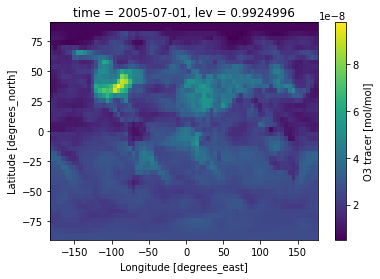

In [24]:
dr_surf.plot();

It looks Ozone-ish... IDL/gamap users might prefer the WhGrYlRd scheme. It is not available in [matplotlib's colormaps](https://matplotlib.org/examples/color/colormaps_reference.html), but I extracted it from gamap, in the Python script [gamap_colormap.py](./gamap_colormap.py).

In [25]:
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script
type(WhGrYlRd)  # our custom colormap

matplotlib.colors.ListedColormap

Now the field looks a lot more familiar...

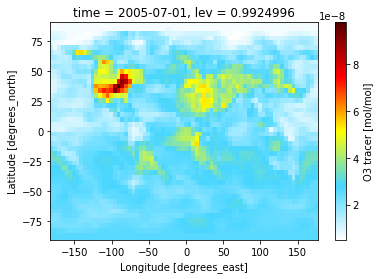

In [26]:
dr_surf.plot(cmap=WhGrYlRd);

Geographical map can be added by Cartopy, as in Chapter 0.

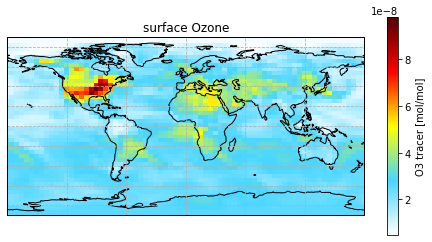

In [27]:
fig = plt.figure(figsize=[8, 4])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(linestyle='--')

dr_surf.plot(ax=ax, cmap=WhGrYlRd)  # The ax keyword is particularly useful for subplots. Can be omitted here.
ax.set_title('surface Ozone');

Multi-panel plots and PNG generation can also be done as in Chapter 0.

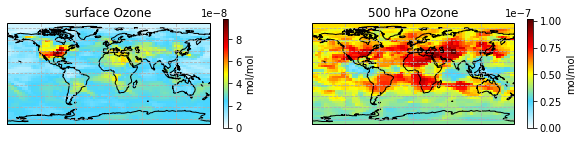

In [28]:
# We use the "subplot_kw" argument to apply cartopy on each sub-panel
# Full documentation available at https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
fig, axes = plt.subplots(1, 2, figsize=[10, 4], subplot_kw={'projection': ccrs.PlateCarree()})

# We use the "cbar_kwargs" argument to tweak colorbar.
# Full documentation available at http://xarray.pydata.org/en/stable/generated/xarray.plot.pcolormesh.html
dr_surf.plot(ax=axes[0], cmap=WhGrYlRd, vmin=0, cbar_kwargs={'shrink': 0.5, 'label': 'mol/mol'})
axes[0].set_title('surface Ozone')

# Also plot 500 hPa Ozone (the 23rd layer)
ds['TRC_O3'].isel(time=0, lev=22).plot(ax=axes[1], cmap=WhGrYlRd, vmin=0, cbar_kwargs={'shrink': 0.5, 'label': 'mol/mol'})
axes[1].set_title('500 hPa Ozone')

# Use for loop to save some coding. Useful when there are a lot of subplots.
for ax in axes:
    ax.coastlines()
    ax.gridlines(linestyle='--')
    
fig.savefig('Ozone.png', dpi=300)  # same as plt.savefig in this case.

In [29]:
!ls Ozone.png

Ozone.png


You can view and download the file `Ozone.png` in Jupyter's main interface.

# Interactive exploration

One of my favorite thing about Jupyter is **interactive plotting**. It allows you to understand the simulation results really quickly.

See how many tracers we have! That's just tropchem; there are much more tracers in standard chemistry. Exploring all tracers would be quite hard without some interactivity.

In [30]:
varnames = list(ds.data_vars.keys())  # Get a list of variable names. The expression is a bit cumbersome. Just copy and paste it for now.
nvar = len(varnames)  # how many elements in the list?

print(nvar, varnames)

66 ['TRC_NO', 'TRC_O3', 'TRC_PAN', 'TRC_CO', 'TRC_ALK4', 'TRC_ISOP', 'TRC_HNO3', 'TRC_H2O2', 'TRC_ACET', 'TRC_MEK', 'TRC_ALD2', 'TRC_RCHO', 'TRC_MVK', 'TRC_MACR', 'TRC_PMN', 'TRC_PPN', 'TRC_R4N2', 'TRC_PRPE', 'TRC_C3H8', 'TRC_CH2O', 'TRC_C2H6', 'TRC_N2O5', 'TRC_HNO4', 'TRC_MP', 'TRC_DMS', 'TRC_SO2', 'TRC_SO4', 'TRC_SO4s', 'TRC_MSA', 'TRC_NH3', 'TRC_NH4', 'TRC_NIT', 'TRC_NITs', 'TRC_BCPI', 'TRC_OCPI', 'TRC_BCPO', 'TRC_OCPO', 'TRC_DST1', 'TRC_DST2', 'TRC_DST3', 'TRC_DST4', 'TRC_SALA', 'TRC_SALC', 'TRC_Br2', 'TRC_Br', 'TRC_BrO', 'TRC_HOBr', 'TRC_HBr', 'TRC_BrNO2', 'TRC_BrNO3', 'TRC_CHBr3', 'TRC_CH2Br2', 'TRC_CH3Br', 'TRC_MPN', 'TRC_ISOPN', 'TRC_MOBA', 'TRC_PROPNN', 'TRC_HAC', 'TRC_GLYC', 'TRC_MMN', 'TRC_RIP', 'TRC_IEPOX', 'TRC_MAP', 'TRC_NO2', 'TRC_NO3', 'TRC_HNO2']


On a 2D screen, It is only possible to plot one variable at one layer. Let's make a convenience function that takes variable name and layer index as input:

In [31]:
def plot_layer(var, l):
    fig = plt.figure(figsize=[8, 4])
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(linestyle='--')
    
    ds[var].isel(time=0, lev=l).plot(ax=ax, cmap=WhGrYlRd)
    ax.set_title(var+f'; lev={l}')
    
    # recall that Python uses indentation to determine the end of a function or a "for" loop
    # there is no "end" expression

You can use this function by specifying the tracer name and layer:

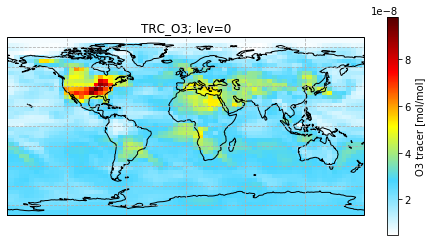

In [32]:
plot_layer('TRC_O3', 0)

Or switch to a different tracer and layer:

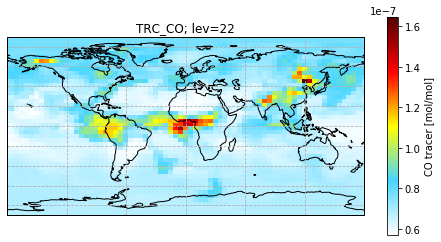

In [33]:
plot_layer('TRC_CO', 22)

Having a convenience function is better than writing code from scratch, but still quite cumbersome. You need to keep changing the input argument to see different layers. Using an interactive widget can make our lives a lot easier.

## Using IPython widgets for interactivity

[ipywidgets](https://ipywidgets.readthedocs.io) is a very mature package to add some interactivity in Jupyter environment.

In [34]:
from ipywidgets import interact, IntSlider, SelectionSlider, Dropdown

We pass our `plot_layer` function to ipywidgets's `interact` function. The tracer name `var` is controlled by a `SelectionSlider` (select from a set of names/strings), while the layer index `l` is controlled by a `IntSlider` (select from continous integers).

Then we get two nice sliders that we can simply drag and see different fields. 

In [35]:
interact(plot_layer, 
         var=SelectionSlider(options=varnames, continuous_update=False), 
         l=IntSlider(min=0, max=46, step=1, continuous_update=False),
        );

# Disable `continuous_update` so the figure is only updated after you release the mouse. This reduces computing burden.

interactive(children=(SelectionSlider(continuous_update=False, description='var', options=('TRC_NO', 'TRC_O3',…

`SelectionSlider` might not be the best way to locate tracer name. The `Dropdown` widget could be better.

In [36]:
interact(plot_layer, 
         var=Dropdown(options=varnames), 
         l=IntSlider(min=0, max=46, step=1, continuous_update=False)
        );

interactive(children=(Dropdown(description='var', options=('TRC_NO', 'TRC_O3', 'TRC_PAN', 'TRC_CO', 'TRC_ALK4'…

Compared to other interactive viewers like `ncview`, ipywidgets gives you much greater interactivity while doesn't restrict the plotting styles at all. You have full control on the plotting function (`plot_layer` here) passed to `interact()`, and can tweak the layout, colormap, labels, etc as you like.

# Computing and plotting zonal profile

We've spent enough time on 2D layer plot. Now let's briefly look at zonal profile. 

When it comes to vertical profile, the first thing you need to check is the **vertical coordinate**. While the `lat` and `lon` variables from NetCDF files are usually the true latitude and longitude, the vertical coordinate can be anything! Some data use height, some use pressure, some just use integer indices... 

GEOS-Chem restart files use the [sigma value](http://wiki.seas.harvard.edu/geos-chem/index.php/GEOS-Chem_vertical_grids#Sigma_grid_definition), which shouldn't be used as the vertical coordinate in a plot.

In [44]:
ds['lev']

<xarray.DataArray 'lev' (lev: 47)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])
Coordinates:
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45 46

For a serious plot it is better to use height or pressure. For now we just use layer indices, to make our subsequent plot look less weird.

In [47]:
ds['lev'] = np.arange(47)  # overwrite the vertical coordinate by integer indices

Now we want to compute zonal mean. Recall that the `mean()` function takes average over the entire array by default.

In [48]:
ds['TRC_O3'].mean()  # returns a scalar

<xarray.DataArray 'TRC_O3' ()>
array(9.1752906e-07, dtype=float32)

To get zonal mean (only average over longitude), use the `dim` keyword.

In [49]:
dr_zm = ds['TRC_O3'].mean(dim='lon')
dr_zm 

<xarray.DataArray 'TRC_O3' (time: 1, lev: 47, lat: 46)>
array([[[2.6152374e-08, 2.6194947e-08, 2.5725237e-08, ...,
         1.0479322e-08, 6.5392984e-09, 6.4600831e-09],
        [2.6328509e-08, 2.6341358e-08, 2.6298183e-08, ...,
         1.3434382e-08, 1.0794238e-08, 1.0847146e-08],
        [2.6498927e-08, 2.6484916e-08, 2.6580560e-08, ...,
         1.7146444e-08, 1.8342080e-08, 1.8308159e-08],
        ...,
        [1.5519535e-06, 1.5519535e-06, 1.6847375e-06, ...,
         1.0555354e-06, 1.0608269e-06, 1.0608269e-06],
        [2.1901165e-07, 2.1901162e-07, 2.2197719e-07, ...,
         2.5042578e-07, 2.4843760e-07, 2.4843760e-07],
        [5.9938827e-08, 5.9938820e-08, 6.0476616e-08, ...,
         6.8698554e-08, 6.8322663e-08, 6.8322663e-08]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2005-07-01
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45 46
  * lat      (lat) float32 -89.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 89.0

In pure numpy, this can be done by the `axis` kerword. But xarray allows you to NOT think about the order of dimensions, but focus on the actual meaning of the dimension (i.e. we want average over "longitude", rather than "the 3-rd axis"). xarray code is more readable for others.

In [50]:
ds['TRC_O3'].values.mean(axis=3)  # same result as above, but less self-explanatory than xarray

array([[[2.6152374e-08, 2.6194947e-08, 2.5725237e-08, ...,
         1.0479322e-08, 6.5392984e-09, 6.4600831e-09],
        [2.6328509e-08, 2.6341358e-08, 2.6298183e-08, ...,
         1.3434382e-08, 1.0794238e-08, 1.0847146e-08],
        [2.6498927e-08, 2.6484916e-08, 2.6580560e-08, ...,
         1.7146444e-08, 1.8342080e-08, 1.8308159e-08],
        ...,
        [1.5519535e-06, 1.5519535e-06, 1.6847375e-06, ...,
         1.0555354e-06, 1.0608269e-06, 1.0608269e-06],
        [2.1901165e-07, 2.1901162e-07, 2.2197719e-07, ...,
         2.5042578e-07, 2.4843760e-07, 2.4843760e-07],
        [5.9938827e-08, 5.9938820e-08, 6.0476616e-08, ...,
         6.8698554e-08, 6.8322663e-08, 6.8322663e-08]]], dtype=float32)

Plotting zonal profile is extremely easy, since map/Cartopy is not required.

Text(0.5, 1.0, 'O3; zonal mean')

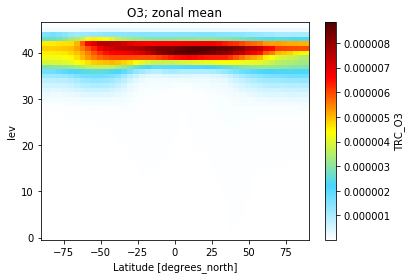

In [51]:
dr_zm.plot(cmap=WhGrYlRd)
plt.title('O3; zonal mean') # overwrite default title

Add an interactive slider for tracers. Adding `@interact` on the top of a function is a shortcut for "defining this function and then pass it to `interact()`"

In [52]:
@interact(var=SelectionSlider(options=varnames, continuous_update=False))
def plot_zonal_mean(var):
    ds[var].mean(dim=['lon']).plot(cmap=WhGrYlRd)
    plt.title(var+'; zonal mean')

interactive(children=(SelectionSlider(continuous_update=False, description='var', options=('TRC_NO', 'TRC_O3',…

Now you know how to use xarray to explore NetCDF data, in a really efficient way.

This is the longest and the most important chapter. With the knowledge of xarray, you can easily understand the next two chapters (they don't need to be read in order):

- [Chapter02_NC_and_bpch_diagnostics.ipynb](./Chapter02_NC_and_bpch_diagnostics.ipynb).
- [Chapter03_regridding.ipynb](./Chapter03_regridding.ipynb)